In [2]:
import torch
torch.cuda.empty_cache() 

In [3]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [4]:
import pandas as pd
import pyproj

In [5]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
from pathlib import Path

In [7]:
import joblib

In [8]:
from mt_function_yl import *

In [9]:
import seaborn as sn

In [10]:
from scipy import stats

In [11]:
from tabulate import tabulate

In [12]:
import statsmodels.api as sm

In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn import linear_model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn import svm

import seaborn as sn


# For regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import PredictionErrorDisplay

### Data loading

In [67]:
aa = pd.read_csv('/home/yelhe/script/mt/dataraw/dfaa.csv')

In [68]:
# Curb related variables
crv = pd.read_csv('/home/yelhe/script/mt/output/accident_rm_norm_stan.csv')
# Traffic-transport related variables
ttv = pd.read_csv('/home/yelhe/data/Traffic_network_variables/ttvariables_all.csv')

In [69]:
crv.columns

Index(['id', 'G', 'SV', 'LV', 'pd', 'cp', 'ie', 'iemin', 'iemax', 'mew',
       'mewmin', 'mewmax', 'meg', 'megmin', 'megmax', 'cmean', 'cmin', 'cmax'],
      dtype='object')

In [70]:
crv = crv.rename(columns = {'id': 'Nr'})
crv = crv.drop(['G', 'SV', 'LV', 'pd'], axis = 1)

In [71]:
ttv.columns

Index(['Nr', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar',
       'dparktw', 'dpedcro', 'dstopsign', 'dcurb', 'dtrafficarea', 'droad',
       'droad_sl', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value',
       'speedlimit_value', 'curbtype', 'z_qnr', 'z_knr', 'trafficarea',
       'r_width', 'r_surface', 'speedlimit', 'curbtype_1', 'curbtype_2',
       'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6',
       'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12',
       'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
       'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'z_knr_12', 'trafficarea_1', 'trafficarea_2',
       't

In [72]:
dfin = pd.read_csv('/home/yelhe/script/mt/dataraw/dfin.csv')
dfbe = pd.read_csv('/home/yelhe/script/mt/dataraw/dfbe.csv')
dfop = pd.read_csv('/home/yelhe/script/mt/dataraw/dfop.csv')
dfb1 = pd.read_csv('/home/yelhe/script/mt/dataraw/dfb1.csv')
dfb2 = pd.read_csv('/home/yelhe/script/mt/dataraw/dfb2.csv')

In [73]:
acc = aa[['Nr','SV','LV','pd']]
ap = acc.copy(deep = True)
ap = ap.assign(svp = 1)
ap = ap.assign(lvp = 1)
ap = ap.assign(pdp = 1)
ap.loc[ap['SV'] == 0, 'svp'] = 0
ap.loc[ap['LV'] == 0, 'lvp'] = 0
ap.loc[ap['pd'] == 0, 'pdp'] = 0

In [74]:
dfall = crv.merge(ttv, on = ['Nr'])
dfall = dfall.merge(ap, on = ['Nr'])

### Regression

In [48]:
cn = ['cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 
      'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtraml', 
      'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dcurb',
      'dtrafficarea', 'droad', 'droad_sl', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value',
      'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5',
      'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13',
      'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
      'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'z_knr_12', 'trafficarea_1', 'trafficarea_2',
       'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2',
       'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4',
       'speedlimit_5', 'speedlimit_6']

In [146]:
len(cn)

97

In [77]:
dfall.shape

(295, 111)

In [55]:
y1 = dfall['svp']
x = dfall[cn]
x = sm.add_constant(x)
model1 = sm.OLS(y1, x)
result1 = model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    svp   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.078
Date:                Tue, 26 Mar 2024   Prob (F-statistic):              0.334
Time:                        14:07:21   Log-Likelihood:                -81.371
No. Observations:                 295   AIC:                             312.7
Df Residuals:                     220   BIC:                             589.3
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cp                  -0.1223      0.224     -0.546      0.586      -0.564       0.319
ie                   0.3184      0.221      1.440      0.151      -0.117       0.754
iemin               -0.1523      0.138     -1.107      0.269      -0.423       0.119
iemax               -0.1782      0.110     -1.614      0.108      -0.396       0.039
mew                 -0.0738      0.122     -0.606      0.545      -0.314       0.166
mewmin               0.0596      0.081      0.740      0.460      -0.099       0.218
mewmax              -0.0283      0.067     -0.422      0.673      -0.160       0.104
meg                 -0.0226      0.087     -0.259      0.796      -0.194       0.149
megmin               0.0053      0.062      0.085      0.932      -0.117       0.128
megmax               0.0573      0.049      1.177      0.241      -0.039       0.153
cmean                0.0716      0.122      0.589      0.557      -0.168       0.311
cmin                -0.0265      0.027     -0.971      0.333      -0.080       0.027
cmax                -0.0242      0.162     -0.149      0.882      -0.344       0.295
dbusl               -0.0022      0.032     -0.068      0.946      -0.066       0.061
dtraml              -0.0192      0.033     -0.585      0.559      -0.084       0.046
dtrainl             -0.0510      0.031     -1.627      0.105      -0.113       0.011
dplight             -0.0291      0.027     -1.074      0.284      -0.082       0.024
dstation             0.0426      0.028      1.522      0.129      -0.013       0.098
dparkcar            -0.0186      0.032     -0.573      0.567      -0.083       0.045
dparktw              0.0173      0.031      0.560      0.576      -0.044       0.078
dpedcro              0.0225      0.027      0.828      0.409      -0.031       0.076
dstopsign            0.0111      0.036      0.309      0.757      -0.060       0.082
dcurb               -0.0765      0.047     -1.627      0.105      -0.169       0.016
dtrafficarea         0.0235      0.037      0.627      0.531      -0.050       0.097
droad                0.2566      0.140      1.836      0.068      -0.019       0.532
droad_sl            -0.1601      0.143     -1.119      0.264      -0.442       0.122
dvfpath              0.0182      0.037      0.498      0.619      -0.054       0.090
gvm_dwv              0.2561      0.204      1.254      0.211      -0.146       0.659
gvm_msp             -0.1175      0.174     -0.674      0.501      -0.461       0.226
gvm_asp             -0.0554      0.204     -0.272      0.786      -0.457       0.346
r_width_value        0.0441      0.040      1.090      0.277      -0.036       0.124
speedlimit_value     0.0715      0.084      0.847      0.398      -0.095       0.238
curbtype_1           0.1253      0.060      2.104      0.037       0.008       0.243
curbtype_2           0.

In [56]:
y2 = dfall['lvp']
x = dfall[cn]
x = sm.add_constant(x)
model2 = sm.OLS(y2, x)
result2 = model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lvp   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.010
Date:                Tue, 26 Mar 2024   Prob (F-statistic):              0.467
Time:                        14:07:22   Log-Likelihood:                -139.68
No. Observations:                 295   AIC:                             429.4
Df Residuals:                     220   BIC:                             705.9
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cp                   0.2872      0.273      1.052      0.294      -0.251       0.826
ie                  -0.4529      0.269     -1.681      0.094      -0.984       0.078
iemin                0.3443      0.168      2.054      0.041       0.014       0.675
iemax                0.2076      0.134      1.544      0.124      -0.057       0.473
mew                 -0.0414      0.148     -0.279      0.780      -0.334       0.251
mewmin              -0.0124      0.098     -0.127      0.899      -0.206       0.181
mewmax               0.0894      0.082      1.095      0.275      -0.071       0.250
meg                 -0.0074      0.106     -0.070      0.944      -0.217       0.202
megmin               0.0247      0.076      0.326      0.745      -0.125       0.174
megmax               0.0020      0.059      0.033      0.974      -0.115       0.119
cmean               -0.0623      0.148     -0.420      0.675      -0.354       0.230
cmin                 0.0500      0.033      1.502      0.135      -0.016       0.116
cmax                -0.0667      0.198     -0.337      0.736      -0.456       0.323
dbusl               -0.0361      0.039     -0.918      0.360      -0.114       0.041
dtraml              -0.0440      0.040     -1.097      0.274      -0.123       0.035
dtrainl              0.0294      0.038      0.769      0.443      -0.046       0.105
dplight              0.0343      0.033      1.039      0.300      -0.031       0.099
dstation            -0.0507      0.034     -1.487      0.138      -0.118       0.016
dparkcar             0.0264      0.040      0.669      0.504      -0.051       0.104
dparktw              0.0149      0.038      0.395      0.693      -0.059       0.089
dpedcro              0.0040      0.033      0.121      0.904      -0.061       0.069
dstopsign           -0.0571      0.044     -1.304      0.194      -0.144       0.029
dcurb                0.0759      0.057      1.325      0.187      -0.037       0.189
dtrafficarea        -0.0606      0.046     -1.326      0.186      -0.151       0.029
droad               -0.2241      0.170     -1.315      0.190      -0.560       0.112
droad_sl             0.2295      0.174      1.316      0.190      -0.114       0.573
dvfpath             -0.0201      0.045     -0.450      0.653      -0.108       0.068
gvm_dwv             -0.2189      0.249     -0.880      0.380      -0.709       0.272
gvm_msp              0.1779      0.212      0.838      0.403      -0.241       0.596
gvm_asp             -0.0117      0.248     -0.047      0.963      -0.501       0.478
r_width_value       -0.0597      0.049     -1.212      0.227      -0.157       0.037
speedlimit_value    -0.0366      0.103     -0.356      0.722      -0.239       0.166
curbtype_1           0.0316      0.073      0.435      0.664      -0.111       0.175
curbtype_2           0.

In [57]:
y3 = dfall['pdp']
x = dfall[cn]
x = sm.add_constant(x)
model3 = sm.OLS(y3, x)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pdp   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.189
Date:                Tue, 26 Mar 2024   Prob (F-statistic):              0.171
Time:                        14:07:22   Log-Likelihood:                -164.48
No. Observations:                 295   AIC:                             479.0
Df Residuals:                     220   BIC:                             755.5
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cp                   0.1429      0.297      0.481      0.631      -0.443       0.728
ie                  -0.2141      0.293     -0.731      0.466      -0.792       0.363
iemin                0.0411      0.182      0.225      0.822      -0.318       0.400
iemax                0.1772      0.146      1.211      0.227      -0.111       0.465
mew                 -0.0040      0.161     -0.025      0.980      -0.322       0.314
mewmin               0.0205      0.107      0.192      0.848      -0.190       0.231
mewmax               0.0296      0.089      0.333      0.739      -0.145       0.205
meg                 -0.1905      0.116     -1.648      0.101      -0.418       0.037
megmin               0.1280      0.083      1.551      0.122      -0.035       0.291
megmax               0.0564      0.064      0.874      0.383      -0.071       0.183
cmean               -0.1200      0.161     -0.745      0.457      -0.438       0.198
cmin                -0.0381      0.036     -1.052      0.294      -0.110       0.033
cmax                 0.0612      0.215      0.285      0.776      -0.363       0.485
dbusl               -0.0277      0.043     -0.647      0.518      -0.112       0.057
dtraml              -0.0229      0.044     -0.525      0.600      -0.109       0.063
dtrainl             -0.0166      0.042     -0.399      0.690      -0.098       0.065
dplight              0.0679      0.036      1.890      0.060      -0.003       0.139
dstation             0.0538      0.037      1.450      0.148      -0.019       0.127
dparkcar             0.0112      0.043      0.261      0.795      -0.074       0.096
dparktw             -0.0456      0.041     -1.112      0.267      -0.126       0.035
dpedcro             -0.0616      0.036     -1.710      0.089      -0.133       0.009
dstopsign            0.0646      0.048      1.355      0.177      -0.029       0.159
dcurb               -0.0303      0.062     -0.486      0.627      -0.153       0.093
dtrafficarea         0.0334      0.050      0.673      0.501      -0.064       0.131
droad               -0.1443      0.185     -0.779      0.437      -0.509       0.221
droad_sl             0.0513      0.190      0.270      0.787      -0.323       0.425
dvfpath              0.0212      0.048      0.437      0.663      -0.074       0.117
gvm_dwv             -0.1436      0.271     -0.530      0.596      -0.677       0.390
gvm_msp              0.1887      0.231      0.817      0.415      -0.267       0.644
gvm_asp              0.0223      0.270      0.082      0.934      -0.510       0.555
r_width_value       -0.0832      0.054     -1.554      0.122      -0.189       0.022
speedlimit_value    -0.0704      0.112     -0.629      0.530      -0.291       0.150
curbtype_1           0.0648      0.079      0.821      0.412      -0.091       0.220
curbtype_2           0.

In [60]:
y4 = dfall['LV']
x = dfall[cn]
x = sm.add_constant(x)
model4 = sm.OLS(y4, x)
result4 = model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     LV   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.9326
Date:                Tue, 26 Mar 2024   Prob (F-statistic):              0.630
Time:                        14:07:46   Log-Likelihood:                -195.21
No. Observations:                 295   AIC:                             540.4
Df Residuals:                     220   BIC:                             816.9
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cp                   0.2306      0.330      0.699      0.485      -0.419       0.880
ie                  -0.6285      0.325     -1.932      0.055      -1.269       0.012
iemin                0.4465      0.202      2.207      0.028       0.048       0.845
iemax                0.2782      0.162      1.714      0.088      -0.042       0.598
mew                 -0.2268      0.179     -1.267      0.206      -0.580       0.126
mewmin               0.0790      0.118      0.667      0.506      -0.154       0.312
mewmax               0.1691      0.099      1.715      0.088      -0.025       0.363
meg                 -0.0128      0.128     -0.099      0.921      -0.266       0.240
megmin               0.0423      0.092      0.462      0.645      -0.138       0.223
megmax              -0.0218      0.072     -0.305      0.761      -0.163       0.119
cmean                0.0362      0.179      0.202      0.840      -0.316       0.389
cmin                 0.0507      0.040      1.261      0.209      -0.029       0.130
cmax                -0.1186      0.239     -0.497      0.620      -0.589       0.352
dbusl               -0.0597      0.048     -1.257      0.210      -0.153       0.034
dtraml              -0.0413      0.048     -0.855      0.394      -0.137       0.054
dtrainl              0.0432      0.046      0.937      0.350      -0.048       0.134
dplight              0.0443      0.040      1.112      0.267      -0.034       0.123
dstation            -0.0552      0.041     -1.340      0.182      -0.136       0.026
dparkcar             0.0023      0.048      0.049      0.961      -0.092       0.096
dparktw              0.0129      0.046      0.284      0.777      -0.077       0.103
dpedcro             -0.0106      0.040     -0.265      0.791      -0.089       0.068
dstopsign           -0.0330      0.053     -0.623      0.534      -0.137       0.071
dcurb                0.0939      0.069      1.358      0.176      -0.042       0.230
dtrafficarea        -0.0824      0.055     -1.495      0.136      -0.191       0.026
droad               -0.2668      0.206     -1.297      0.196      -0.672       0.138
droad_sl             0.3117      0.211      1.480      0.140      -0.103       0.727
dvfpath             -0.0525      0.054     -0.975      0.330      -0.159       0.054
gvm_dwv             -0.3006      0.300     -1.001      0.318      -0.893       0.291
gvm_msp              0.4179      0.256      1.630      0.105      -0.087       0.923
gvm_asp             -0.1741      0.300     -0.581      0.562      -0.765       0.417
r_width_value       -0.0625      0.059     -1.051      0.294      -0.180       0.055
speedlimit_value    -0.0336      0.124     -0.270      0.787      -0.278       0.211
curbtype_1           0.0823      0.088      0.939      0.349      -0.090       0.255
curbtype_2           0.

In [61]:
y5 = dfall['pd']
x = dfall[cn]
x = sm.add_constant(x)
model5 = sm.OLS(y5, x)
result5 = model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pd   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1.166
Date:                Tue, 26 Mar 2024   Prob (F-statistic):              0.198
Time:                        14:07:55   Log-Likelihood:                -2770.9
No. Observations:                 295   AIC:                             5692.
Df Residuals:                     220   BIC:                             5968.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cp               -1830.7063   2042.071     -0.896      0.371   -5855.232    2193.819
ie               -4473.4935   2014.216     -2.221      0.027   -8443.122    -503.864
iemin             1484.4987   1252.887      1.185      0.237    -984.699    3953.696
iemax             2786.1635   1005.428      2.771      0.006     804.660    4767.667
mew                 69.2489   1108.809      0.062      0.950   -2115.998    2254.495
mewmin            -346.3906    733.616     -0.472      0.637   -1792.205    1099.424
mewmax             -24.3033    610.494     -0.040      0.968   -1227.469    1178.862
meg              -2748.9561    794.482     -3.460      0.001   -4314.726   -1183.186
megmin            1972.1001    567.082      3.478      0.001     854.492    3089.708
megmax            1462.7182    443.262      3.300      0.001     589.135    2336.302
cmean              719.5316   1108.015      0.649      0.517   -1464.150    2903.213
cmin              -247.1986    249.038     -0.993      0.322    -738.004     243.606
cmax               164.1254   1477.616      0.111      0.912   -2747.969    3076.220
dbusl             -361.6995    294.337     -1.229      0.220    -941.781     218.382
dtraml             133.8160    299.571      0.447      0.656    -456.581     724.213
dtrainl            184.9510    285.602      0.648      0.518    -377.915     747.818
dplight            153.4278    246.819      0.622      0.535    -333.004     639.860
dstation           331.3817    254.943      1.300      0.195    -171.061     833.824
dparkcar          -158.1010    295.451     -0.535      0.593    -740.377     424.175
dparktw           -255.8025    281.930     -0.907      0.365    -811.431     299.826
dpedcro           -391.1600    247.533     -1.580      0.115    -878.998      96.678
dstopsign          254.1683    327.719      0.776      0.439    -391.702     900.038
dcurb             -120.9266    428.293     -0.282      0.778    -965.009     723.156
dtrafficarea        77.4557    341.412      0.227      0.821    -595.401     750.313
droad             -138.1902   1273.491     -0.109      0.914   -2647.994    2371.614
droad_sl          -183.6379   1304.181     -0.141      0.888   -2753.925    2386.649
dvfpath            368.3694    333.199      1.106      0.270    -288.300    1025.039
gvm_dwv           -852.6909   1860.810     -0.458      0.647   -4519.986    2814.604
gvm_msp           -354.4127   1587.851     -0.223      0.824   -3483.759    2774.934
gvm_asp           1456.1803   1856.787      0.784      0.434   -2203.186    5115.547
r_width_value       44.7216    368.130      0.121      0.903    -680.792     770.235
speedlimit_value   363.0318    769.481      0.472      0.638   -1153.465    1879.529
curbtype_1         491.8339    542.553      0.907      0.366    -577.433    1561.101
curbtype_2          24.

In [78]:
# Presence or not
y7 = dfall['svp']
y8 = dfall['lvp']
y9 = dfall['pdp']
x = dfall[cn]

Train data accuracy: 0.9466019417475728
Test data accuracy: 0.8651685393258427
accuracy 0.8651685393258427
precision [0.875 0.   ]
sensitivity recall [0.98717949 0.        ]
f1 score [0.92771084 0.        ]


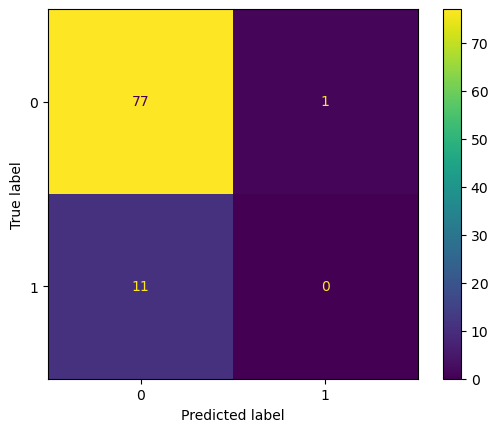

In [103]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(x, y7, 
                                                        test_size = 0.3, random_state = 7)
rfc7 = RandomForestClassifier(n_estimators = 6, random_state = 7) # 6 because of following codes to find the best number of trees
rfc7.fit(X_train7, y_train7)
y_pred_rfc7 = rfc7.predict(X_test7)
print("Train data accuracy:",accuracy_score(y_true = y_train7, y_pred = rfc7.predict(X_train7)))
print("Test data accuracy:",accuracy_score(y_true = y_test7, y_pred = y_pred_rfc7))
confusion_matrix_rfc7 = metrics.confusion_matrix(y_test7, y_pred_rfc7)
cm_display_rfc7 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc7)
cm_display_rfc7.plot()
acc_rfc7 = metrics.accuracy_score(y_test7, y_pred_rfc7)
print('accuracy', acc_rfc7)
pre_rfc7 = metrics.precision_score(y_test7, y_pred_rfc7, average = None)
print('precision', pre_rfc7)
senrec_rfc7 = metrics.recall_score(y_test7, y_pred_rfc7, average = None)
print('sensitivity recall', senrec_rfc7)
f1_rfc7 = metrics.f1_score(y_test7, y_pred_rfc7, average = None)
print('f1 score', f1_rfc7)

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without

Text(0, 0.5, 'accuracy')

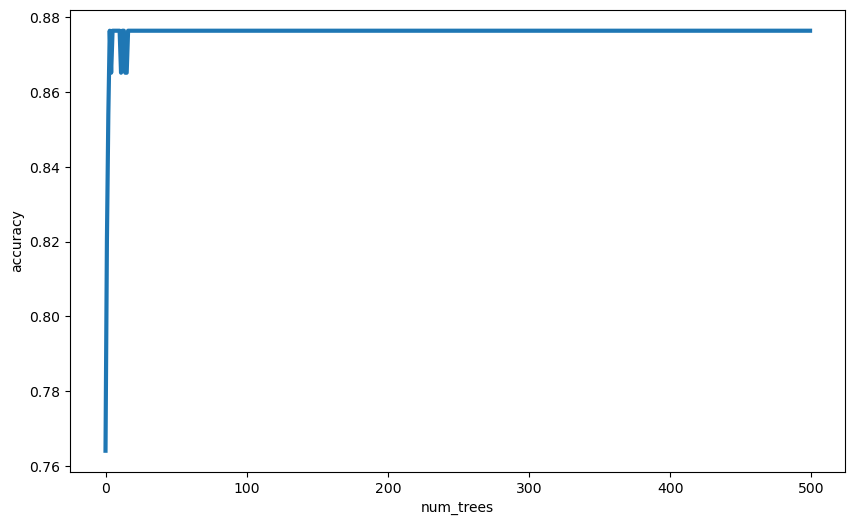

In [98]:
# rf = RandomForestClassifier(n_estimators=500, max_depth=4, n_jobs=-1)
# rf.fit(X_train7, y_train7)
# predictions = []
# for tree in rf.estimators_:
#     predictions.append(tree.predict_proba(X_test7)[None, :])
# predictions = np.vstack(predictions)
# cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
# scores = []
# for pred in cum_mean:
#     scores.append(accuracy_score(y_test7, np.argmax(pred, axis=1)))
# plt.figure(figsize=(10, 6))
# plt.plot(scores, linewidth=3)
# plt.xlabel('num_trees')
# plt.ylabel('accuracy')
# best n_estimator 6

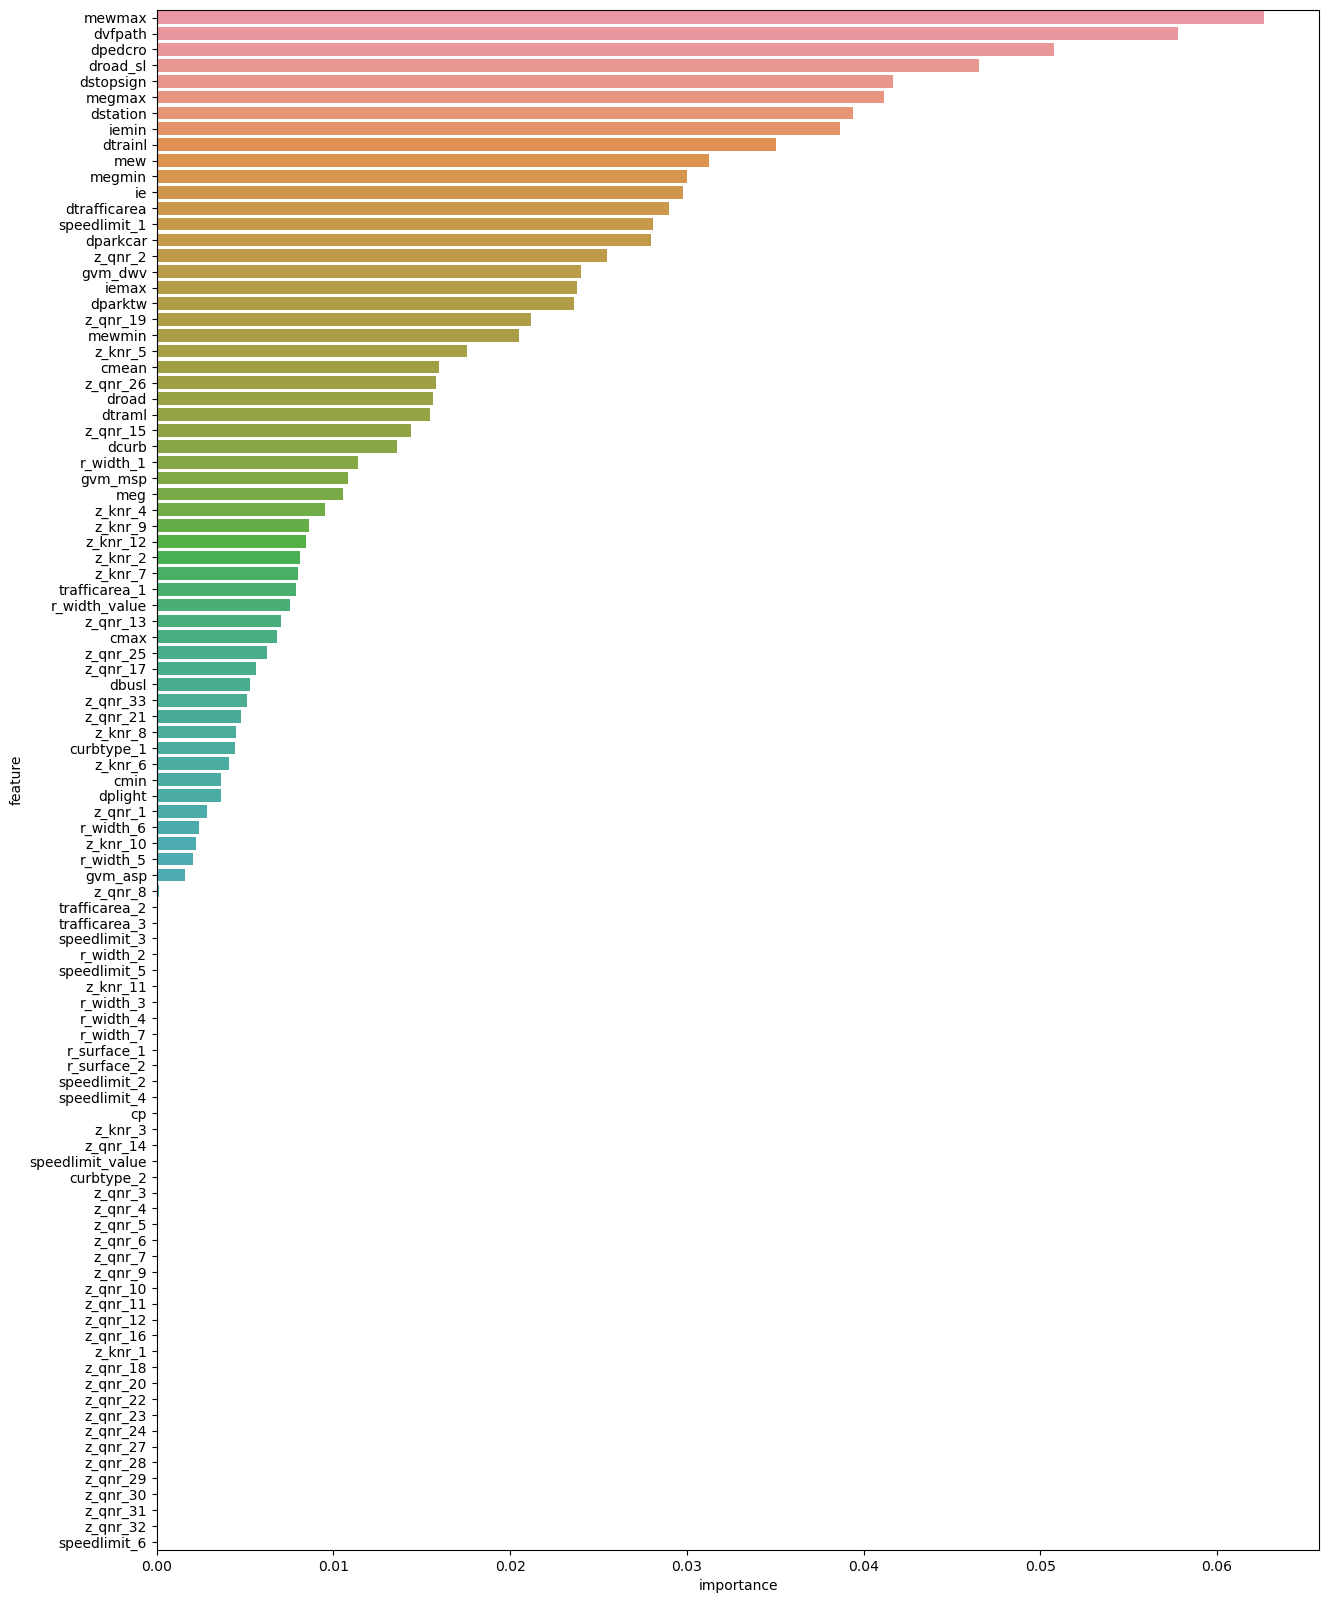

In [137]:
feature_name = list(x.columns.values.tolist())
importances = rfc7.feature_importances_
df_rfc7 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfc7.sort_values(by = ['importances'], ascending = False, inplace = True)
plt.figure(figsize = [15,20])
sn.barplot(x = df_rfc7['importances'], y = df_rfc7['features'])
plt.xlabel('importance')
plt.ylabel('feature')
plt.savefig('svp_rf_importance.png')

Train data accuracy: 0.970873786407767
Test data accuracy: 0.6741573033707865
accuracy 0.6741573033707865
precision [0.375     0.7037037]
sensitivity recall [0.11111111 0.91935484]
f1 score [0.17142857 0.7972028 ]


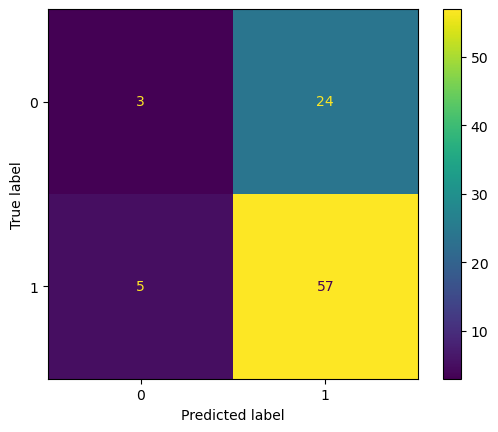

In [132]:
X_train8, X_test8, y_train8, y_test8 = train_test_split(x, y8, 
                                                        test_size = 0.30, random_state = 8)
rfc8 = RandomForestClassifier(n_estimators = 11, max_depth = 8,random_state = 8)
rfc8.fit(X_train8, y_train8)
y_pred_rfc8 = rfc8.predict(X_test8)
print("Train data accuracy:",accuracy_score(y_true = y_train8, y_pred = rfc8.predict(X_train8)))
print("Test data accuracy:",accuracy_score(y_true = y_test8, y_pred = y_pred_rfc8))
confusion_matrix_rfc8 = metrics.confusion_matrix(y_test8, y_pred_rfc8)
cm_display_rfc8 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc8)
cm_display_rfc8.plot()
acc_rfc8 = metrics.accuracy_score(y_test8, y_pred_rfc8)
print('accuracy', acc_rfc8)
pre_rfc8 = metrics.precision_score(y_test8, y_pred_rfc8, average = None)
print('precision', pre_rfc8)
senrec_rfc8 = metrics.recall_score(y_test8, y_pred_rfc8, average = None)
print('sensitivity recall', senrec_rfc8)
f1_rfc8 = metrics.f1_score(y_test8, y_pred_rfc8, average = None)
print('f1 score', f1_rfc8)

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without

Text(0, 0.5, 'accuracy')

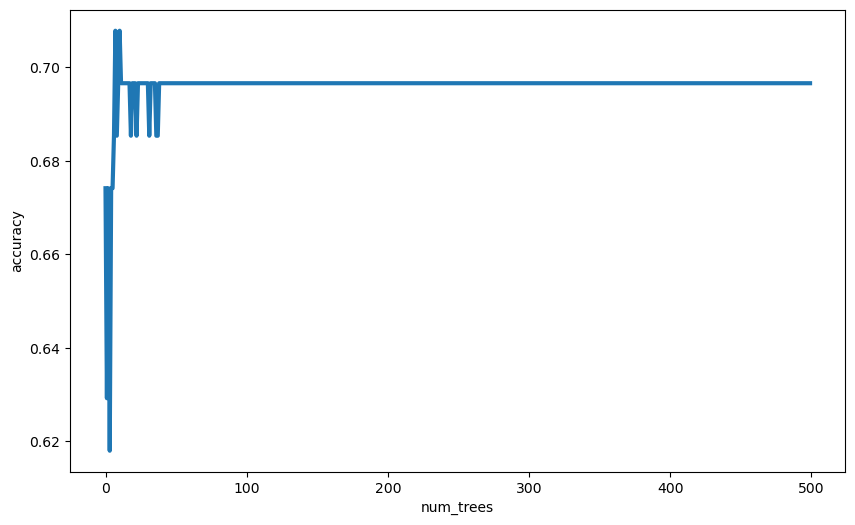

In [104]:
rf = RandomForestClassifier(n_estimators=500, max_depth=4, n_jobs=-1)
rf.fit(X_train8, y_train8)
predictions = []
for tree in rf.estimators_:
    predictions.append(tree.predict_proba(X_test8)[None, :])
predictions = np.vstack(predictions)
cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
scores = []
for pred in cum_mean:
    scores.append(accuracy_score(y_test8, np.argmax(pred, axis=1)))
plt.figure(figsize=(10, 6))
plt.plot(scores, linewidth=3)
plt.xlabel('num_trees')
plt.ylabel('accuracy')
# best n_estimator 11

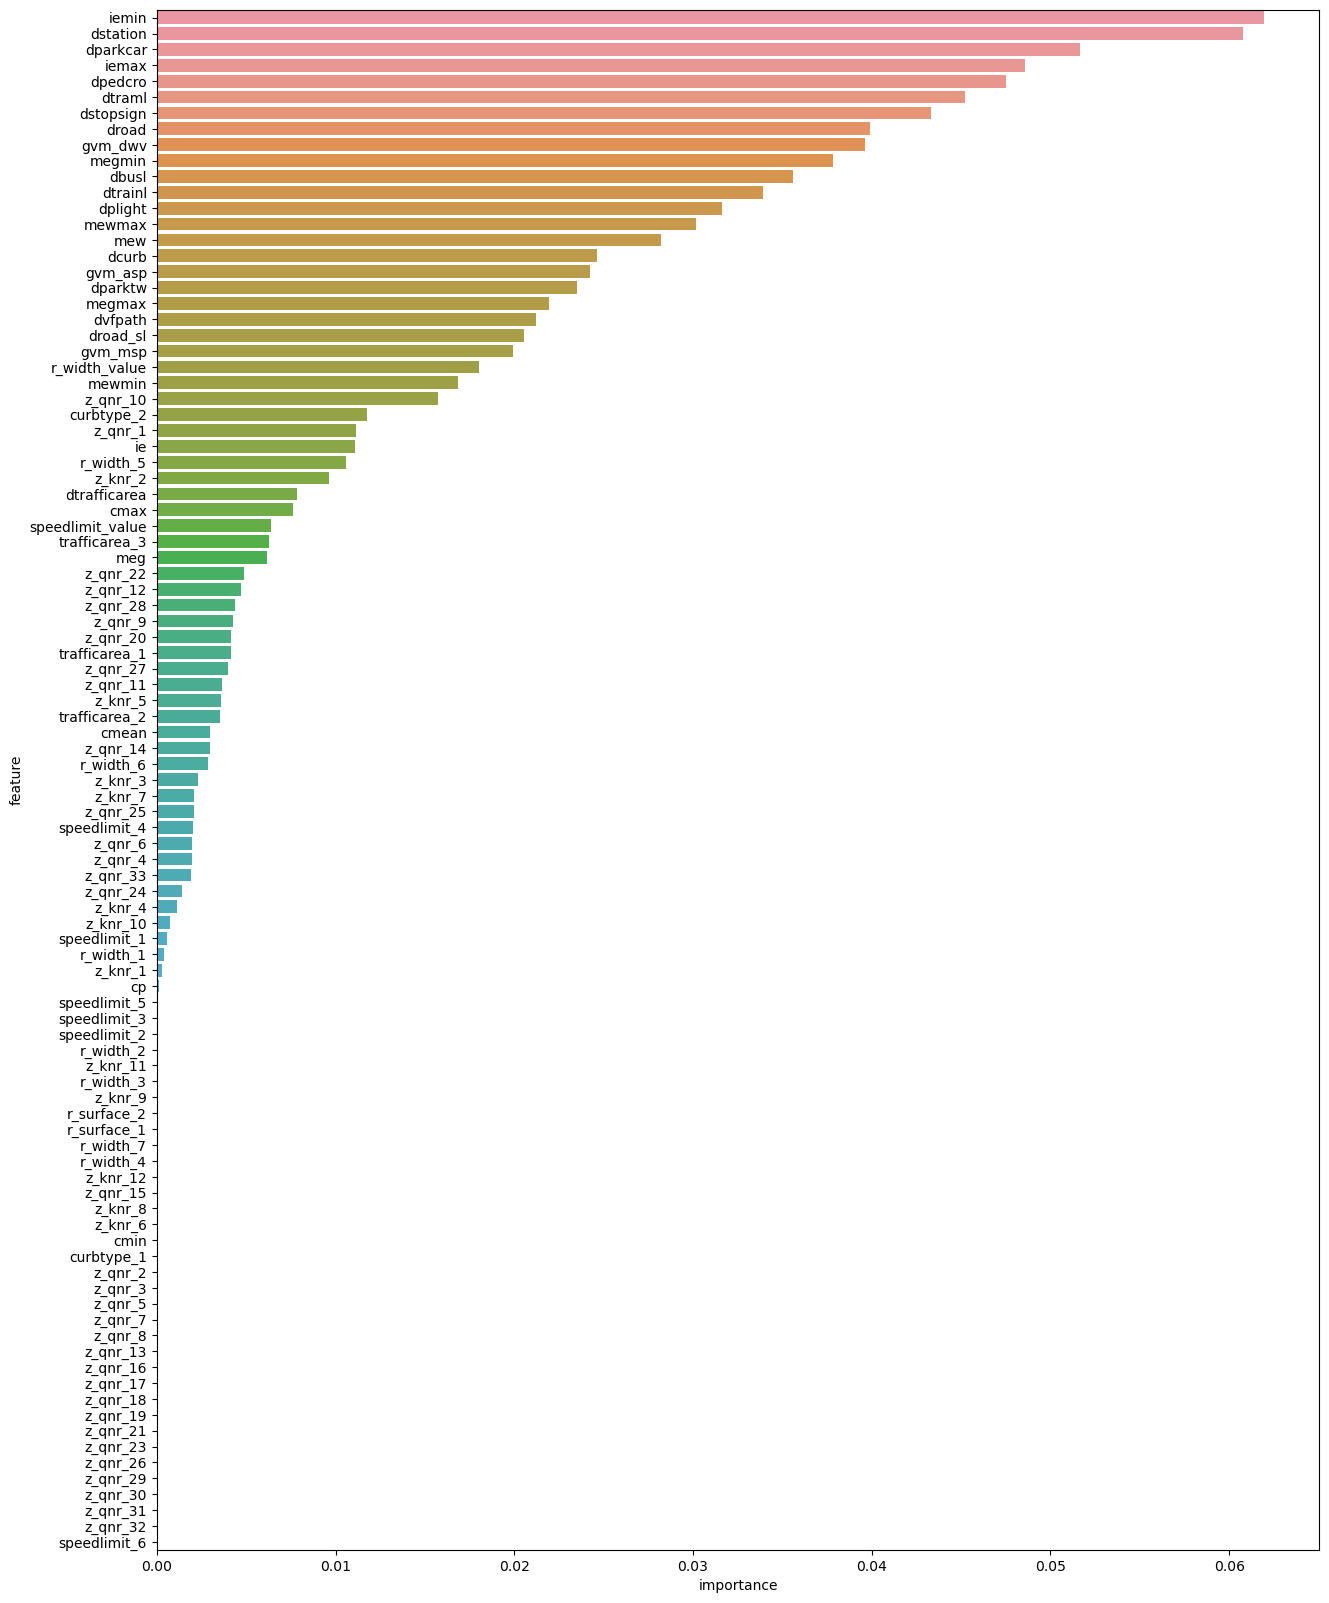

In [138]:
feature_name = list(x.columns.values.tolist())
importances = rfc8.feature_importances_
df_rfc8 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfc8.sort_values(by = ['importances'], ascending = False, inplace = True)
plt.figure(figsize = [15,20])
sn.barplot(x = df_rfc8['importances'], y = df_rfc8['features'])
plt.xlabel('importance')
plt.ylabel('feature')
plt.savefig('lvp_rf_importance.png')

Train data accuracy: 0.8642533936651584
Test data accuracy: 0.5405405405405406
accuracy 0.5405405405405406
precision [0.48837209 0.61290323]
sensitivity recall [0.63636364 0.46341463]
f1 score [0.55263158 0.52777778]


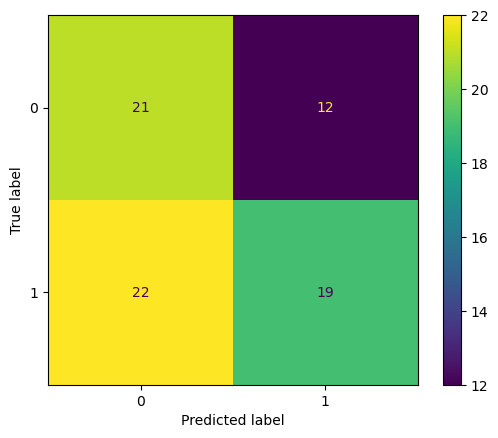

In [144]:
X_train9, X_test9, y_train9, y_test9 = train_test_split(x, y9, 
                                                        test_size = 0.25, random_state = 9)
rfc9 = RandomForestClassifier(n_estimators = 6, max_depth = 5, random_state = 9) # n_estimators setting from following codes
rfc9.fit(X_train9, y_train9)
y_pred_rfc9 = rfc9.predict(X_test9)
print("Train data accuracy:",accuracy_score(y_true = y_train9, y_pred = rfc9.predict(X_train9)))
print("Test data accuracy:",accuracy_score(y_true = y_test9, y_pred = y_pred_rfc9))
confusion_matrix_rfc9 = metrics.confusion_matrix(y_test9, y_pred_rfc9)
cm_display_rfc9 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rfc9)
cm_display_rfc9.plot()
acc_rfc9 = metrics.accuracy_score(y_test9, y_pred_rfc9)
print('accuracy', acc_rfc9)
pre_rfc9 = metrics.precision_score(y_test9, y_pred_rfc9, average = None)
print('precision', pre_rfc9)
senrec_rfc9 = metrics.recall_score(y_test9, y_pred_rfc9, average = None)
print('sensitivity recall', senrec_rfc9)
f1_rfc9 = metrics.f1_score(y_test9, y_pred_rfc9, average = None)
print('f1 score', f1_rfc9)

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without

Text(0, 0.5, 'accuracy')

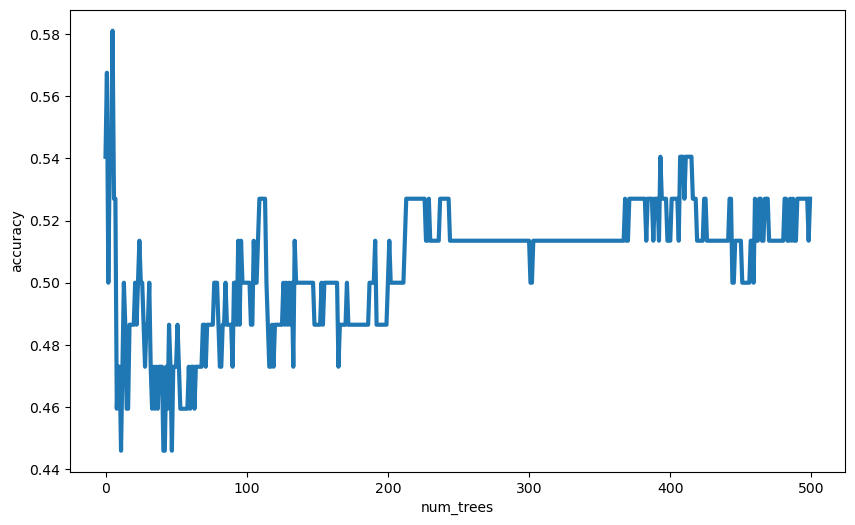

In [114]:
# rf = RandomForestClassifier(n_estimators=500, max_depth=5, n_jobs=-1)
# rf.fit(X_train9, y_train9)
# predictions = []
# for tree in rf.estimators_:
#     predictions.append(tree.predict_proba(X_test9)[None, :])
# predictions = np.vstack(predictions)
# cum_mean = np.cumsum(predictions, axis=0)/np.arange(1, predictions.shape[0] + 1)[:, None, None]
# scores = []
# for pred in cum_mean:
#     scores.append(accuracy_score(y_test9, np.argmax(pred, axis=1)))
# plt.figure(figsize=(10, 6))
# plt.plot(scores, linewidth=3)
# plt.xlabel('num_trees')
# plt.ylabel('accuracy')
# best n_estimator 6

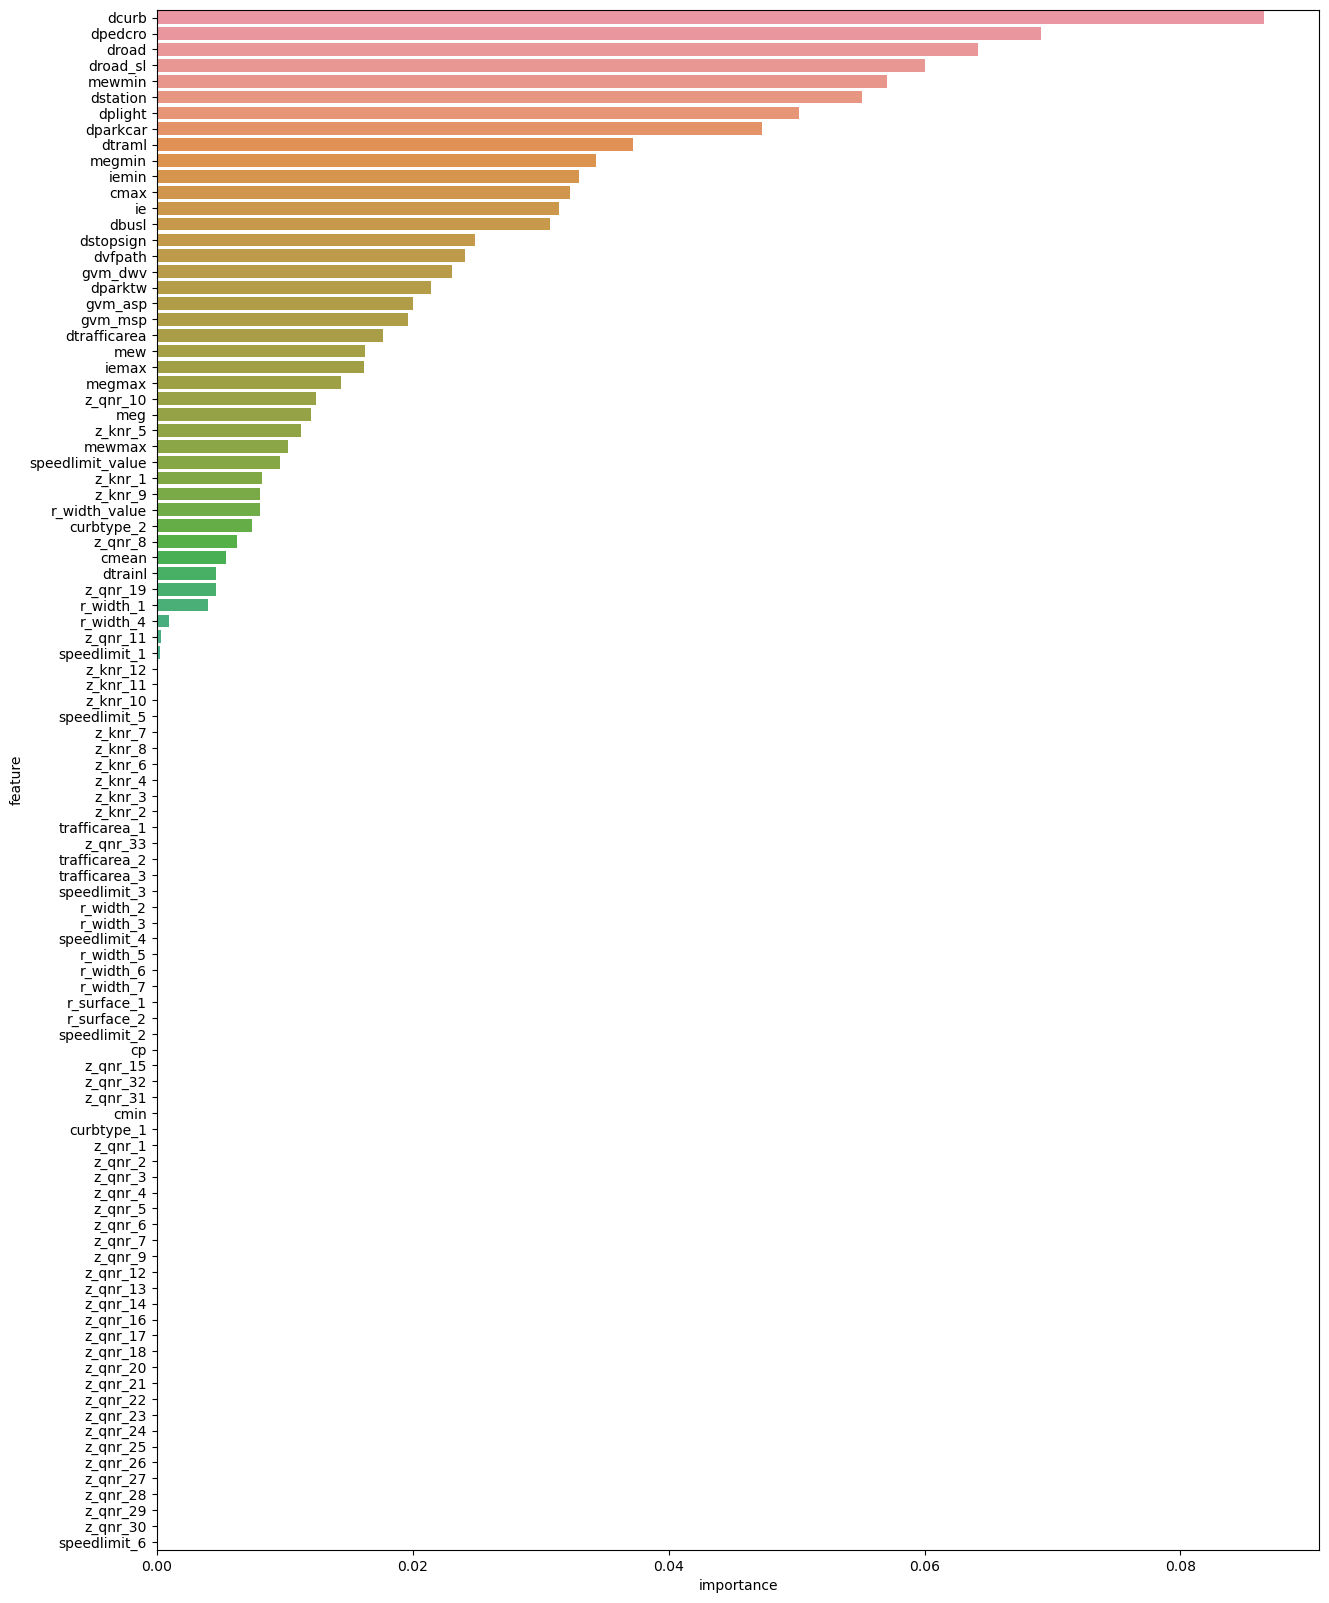

In [145]:
feature_name = list(x.columns.values.tolist())
importances = rfc9.feature_importances_
df_rfc9 = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rfc9.sort_values(by = ['importances'], ascending = False, inplace = True)
plt.figure(figsize = [15,20])
sn.barplot(x = df_rfc9['importances'], y = df_rfc9['features'])
plt.xlabel('importance')
plt.ylabel('feature')
plt.savefig('pd_rf_importance.png')